In [ ]:
import os
import torch
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [ ]:
from copy import deepcopy
from ast import literal_eval
from network.architecture import NetworkPlayground

In [2]:
plt.rcParams.update({
    "axes.labelsize": 18,
    "axes.linewidth": 1.5,
    "axes.titlesize": 20,
    "axes.spines.top": True,
    "axes.spines.right": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "legend.shadow": True,
    "legend.fancybox": True,
    "legend.fontsize": 13.0,
    "legend.framealpha": 1.0,
    "legend.title_fontsize": 20.0,
    "text.usetex": True,
    "xtick.bottom": "on",
    "xtick.direction": "in",
    "xtick.labelsize": 18,
    "xtick.major.pad": 5,
    "xtick.major.size": 16,
    "xtick.major.width": 1.5,
    "xtick.minor.pad": 5,
    "xtick.minor.size": 15,
    "xtick.minor.width": 1.5,
    "xtick.top": "on",
    "ytick.direction": "in",
    "ytick.left": "on",
    "ytick.labelsize": 18,
    "ytick.major.pad": 5,
    "ytick.major.size": 16,
    "ytick.major.width": 1.5,
    "ytick.minor.pad": 5,
    "ytick.minor.size": 15,
    "ytick.minor.width": 1.5,
    "ytick.right": "on",
})

In [3]:
colors_bi = np.array(['#F1C40F', '#34495E'])
cmap = plt.cm.get_cmap('Dark2'); nc = 8

In [4]:
print('Getting Time-based Features')
seconds, folder = 10*60, './results/time_final/'
features_path = f'{folder}/data/features_window_time_{seconds}_acc_m.csv'
features = pd.read_csv(features_path)
data_cl_time = features[['ma_t_acceleration', 'msum_t_roc']]
file_name = f'{folder}/fishing_{nc}_{seconds}.csv'
dataset_time = pd.read_csv(file_name)

Getting Time-based Features


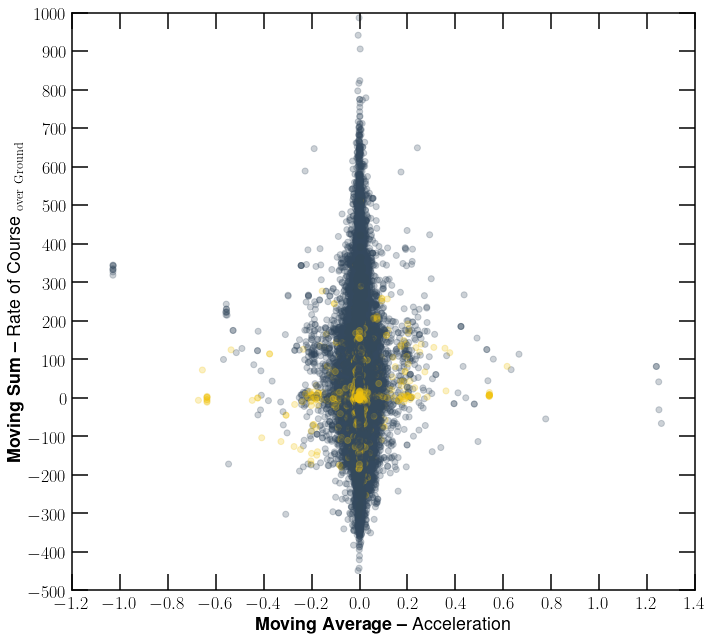

In [13]:
fig = plt.figure(figsize=(10, 9))
plt.scatter(data_cl_time['ma_t_acceleration'], data_cl_time['msum_t_roc'],
            c=colors_bi[dataset_time['labels_pos']], alpha=0.25)
plt.ylabel('\\textbf{Moving Sum --} Rate of Course${}_\mathrm{~over~Ground}$')
plt.xlabel('\\textbf{Moving Average --} Acceleration')
plt.yticks(np.arange(-500, 1100, step=100))
plt.xticks(np.arange(-1.4, 1.5, step=0.2))
plt.ylim(-500, 1000); plt.xlim(-1.2, 1.4)
plt.tight_layout()
plt.savefig(f'./results/images/time_scatter.pdf', bbox_inches='tight')
plt.savefig(f'./results/images/time_scatter.png', bbox_inches='tight', dpi=300)

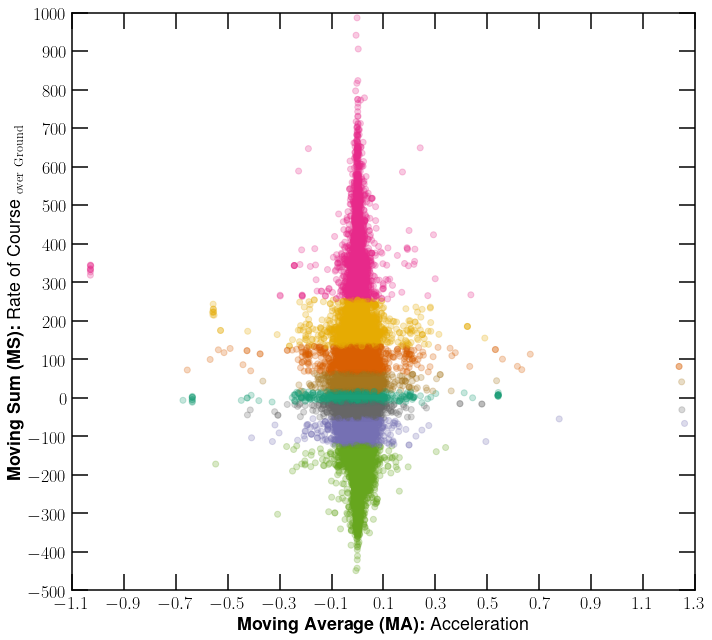

In [10]:
fig = plt.figure(figsize=(10, 9))
plt.scatter(data_cl_time['ma_t_acceleration'], data_cl_time['msum_t_roc'],
            c=cmap(dataset_time['labels']), alpha=0.25)
plt.ylabel('\\textbf{Moving Sum (MS):} Rate of Course${}_\mathrm{~over~Ground}$')
plt.xlabel('\\textbf{Moving Average (MA):} Acceleration')
plt.yticks(np.arange(-600, 1100, step=100))
plt.xticks(np.arange(-1.3, 1.4, step=0.2))
plt.ylim(-500, 1000); plt.xlim(-1.1, 1.3)
plt.tight_layout()
plt.savefig(f'./results/images/time_scatter_{nc}.pdf', bbox_inches='tight')
plt.savefig(f'./results/images/time_scatter_{nc}.png', bbox_inches='tight', dpi=300)

In [7]:
print('Getting Obs-based Features'); win = 10
folder = './results/observations_final/'
features_path = f'{folder}/data/features_window_{win}.csv'
features = pd.read_csv(features_path)
data_cl_obs = features[['ma_acceleration', 'msum_roc']]
file_name = f'{folder}/fishing_{nc}_{win}.csv'
dataset_obs = pd.read_csv(file_name)

Getting Obs-based Features


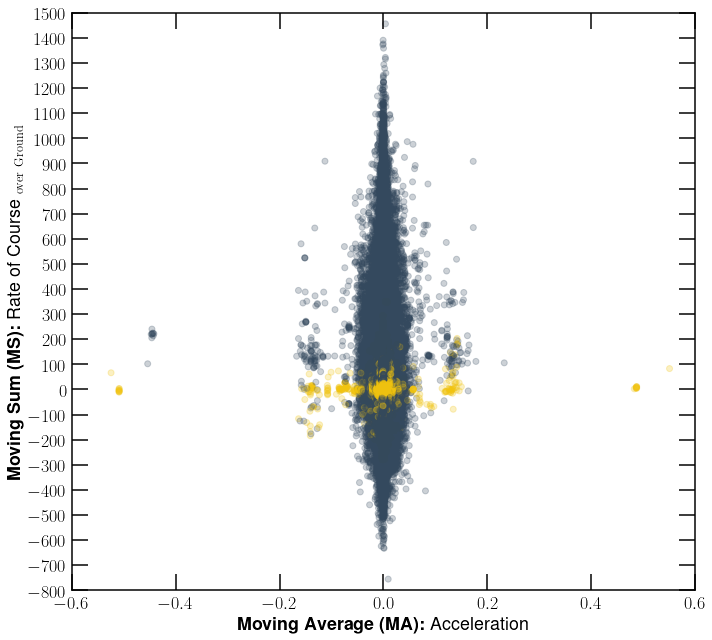

In [8]:
fig = plt.figure(figsize=(10, 9))
plt.scatter(data_cl_obs['ma_acceleration'], data_cl_obs['msum_roc'],
            c=colors_bi[dataset_obs['labels_pos']], alpha=0.25)
plt.ylabel('\\textbf{Moving Sum (MS):} Rate of Course${}_\mathrm{~over~Ground}$')
plt.xlabel('\\textbf{Moving Average (MA):} Acceleration')
plt.yticks(np.arange(-800, 1600, step=100))
plt.xticks(np.arange(-1.0, 0.8, step=0.2))
plt.ylim(-800, 1500); plt.xlim(-.6, 0.6)
plt.tight_layout()
plt.savefig(f'./results/images/obs_scatter.pdf', bbox_inches='tight')
plt.savefig(f'./results/images/obs_scatter.png', bbox_inches='tight', dpi=300)

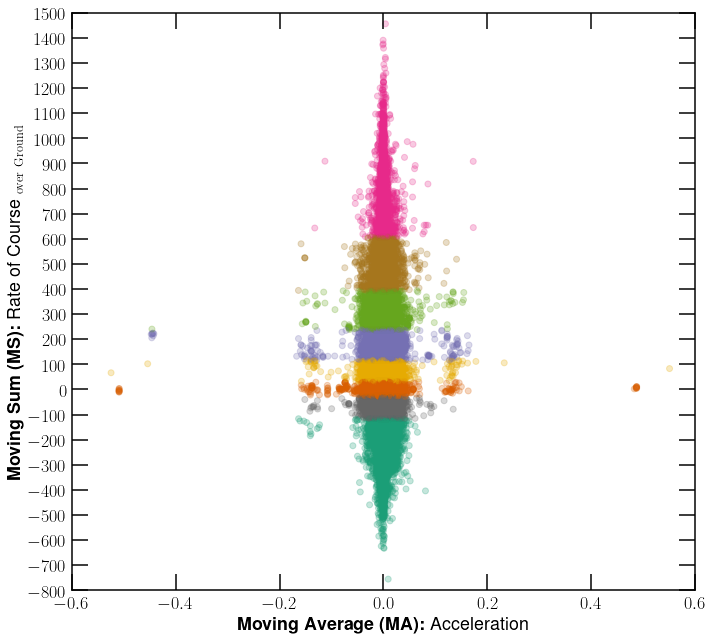

In [9]:
fig = plt.figure(figsize=(10, 9))
plt.scatter(data_cl_obs['ma_acceleration'], data_cl_obs['msum_roc'],
            c=cmap(dataset_obs['labels']), alpha=0.25)
plt.ylabel('\\textbf{Moving Sum (MS):} Rate of Course${}_\mathrm{~over~Ground}$')
plt.xlabel('\\textbf{Moving Average (MA):} Acceleration')
plt.yticks(np.arange(-800, 1600, step=100))
plt.xticks(np.arange(-1.0, 0.8, step=0.2))
plt.ylim(-800, 1500); plt.xlim(-.6, .6)
plt.tight_layout()
plt.savefig(f'./results/images/obs_scatter_{nc}.pdf', bbox_inches='tight')
plt.savefig(f'./results/images/obs_scatter_{nc}.png', bbox_inches='tight', dpi=300)

In [54]:
print('DBI plot')
folder_main = "data/dbi-data/"
eval_obs = pd.read_csv(f'{folder_main}/observations/measures.csv', index_col=0)
eval_time = pd.read_csv(f'{folder_main}/time/measures.csv', index_col=0)
eval_dist = pd.read_csv(f'{folder_main}/dist/measures.csv', index_col=0)

DBI plot


In [55]:
iter = 10
seconds = iter * 60
dist = 10 / 1000
obs_d = eval_obs.loc[:, str(iter)].apply(lambda x: literal_eval(x)[0])
time_d = eval_time.loc[:, str(seconds)].apply(lambda x: literal_eval(x)[0])
dist_d = eval_dist.loc[:, str(dist)].apply(lambda x: literal_eval(x)[0])
index_d = eval_obs.index

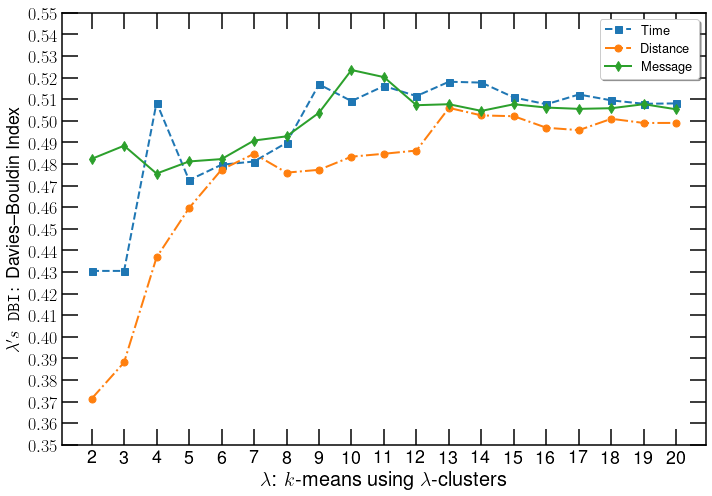

In [72]:
fig = plt.figure(figsize=(10, 7))
plt.plot(index_d, time_d, marker="s", linestyle="--", linewidth=2,
         markersize=7, label='Time')
plt.plot(index_d, dist_d, marker="o", linestyle="-.", linewidth=2,
         markersize=7, label='Distance')
plt.plot(index_d, obs_d, marker="d", linestyle="-", linewidth=2,
         markersize=7, label='Message')
plt.ylabel('\\texttt{$\lambda\'s$~DBI:} Davies–Bouldin Index')
plt.xlabel('$\lambda$: $k$-means using $\lambda$-clusters', fontsize=20)
plt.legend()
plt.xticks(index_d, index_d)
plt.yticks(np.arange(0.35, 0.55, step=0.01))
plt.tight_layout()
plt.savefig(f'./results/images/dbi-kmeans.pdf', bbox_inches='tight')
plt.savefig(f'./results/images/dbi-kmeans.png', bbox_inches='tight', dpi=300)

---

In [ ]:
hyperparameters = {
	"bias": True,
	"dropout": .0,
	"window": 10,  # number of consecutive AIS messages to feed the NN (per mini-batch)
	"variables": 4,  # number of features per AIS message
	"shuffle": True,
	"verbose": True,
	"batch_size": 256,
	"hidden_size": 128,
	"test_samples": 50,  # refers to the number of unique trajectories reserved for test
	"use_amsgrad": True,
	"max_gradnorm": 1.0,
	"random_seed": 6723,
	"tuning_samples": 25,  # refers to the number of unique trajectories reserved for tuning
	"weight_decay": 0.01,
	"recurrent_layers": 1,
	"bidirectional": False,  # whether to assume a multidirectional temporal dependency in the trajectories
	"normalize_data": True,
	"learning_rate": 0.001,
	"learning_patience": 6,
	"scheduler_patience": 2,
	"scheduler_factor": 0.8,
	"recurrent_unit": "LSTM",  # "RNN", "GRU", or "LSTM"
	"improvement_threshold": 0.1,
}

In [ ]:
def batchfy_data(df, window=hyperparameters["window"]):
	"""
		Prepares the dataset for the neural network training.
		The testing portion will be separated by the trainer's class.
		To change the amount of test data, update "test_samples" in the dict above.
	"""
	x, y = [], []
	for mmsi in set(df.mmsi):
		df_mmsi = df[df.mmsi == mmsi]
		if df_mmsi.shape[0] >= window:
			df_mmsi = df_mmsi.sort_values("time")
			df_mmsi = df_mmsi[["lat", "lon", "sog", "cog", "labels_pos"]]
			x.append(torch.from_numpy(df_mmsi.loc[:, df_mmsi.columns != "labels_pos"].to_numpy()))
			y.append(torch.from_numpy(df_mmsi.labels_pos.to_numpy()))
	return x, y

In [ ]:
def test_checkpoint(hyperparams, filename):
	if hyperparams["suffix"] == "T": df = pd.read_csv("../results/time_final/fishing_8_600.csv")
	else: df = pd.read_csv("../results/observations_final/fishing_8_10.csv")
	hyperparameters.update(hyperparams)  # for the current iteration
	hyperparameters["details"] = deepcopy(hyperparams)  # for identification
	return (NetworkPlayground(**hyperparameters).cuda()).test_checkpoint(*batchfy_data(df), filename)

In [ ]:
search_space = {
	"verbose": [False],  # recommended during debugging
	"batch_size": [4096],  # varies with the GPU Memory
	"dropout": [.0, .15],  # RNN's dropout probability
	"suffix": ["T", "O"],  # different datasets (do not change)
	"window": [8, 9, 10],  # according to the unsupervised analysis
	"recurrent_layers": [1, 2, 3],  # number of stacked recurrent layers
	"bidirectional": [True, False],  # temporal-dependency direction
	"hidden_size": [64, 128, 256],  # size of the hidden layers
	"recurrent_unit": ["LSTM", "RNN", "GRU"],  # different RNNs
}  # This is a comprehensive, but reduced, set of possibilities

In [ ]:
queries = []
details = [["suffix", "window", "dropout", "hidden_size", "recurrent_layers",
            "recurrent_unit", "bidirectional", "min_loss", "filename"]]
for f in os.listdir("./training-checkpoints/"):
	checkpoint = torch.load(os.path.join("./training-checkpoints/", f))
	query = checkpoint["details"]; queries.append(checkpoint["details"])
	details.append([query["suffix"], query["window"], query["dropout"],
	                query["hidden_size"], query["recurrent_layers"],
	                query["recurrent_unit"], query["bidirectional"],
	                checkpoint["min_loss"], f])

In [ ]:
if len(details) > 1:
	# Save the compiled results of the models tested this far
	results_df = pd.DataFrame(details[1:], columns=details[0])
	shared_columns = list(set(results_df.columns) - {"min_loss", "filename"})
	compiled_df = results_df.loc[results_df.groupby(shared_columns).min_loss.idxmin()]
	compiled_df = compiled_df[((compiled_df["dropout"] == 0) | ((compiled_df["dropout"] > 0) & (compiled_df["recurrent_layers"] > 1)))]
	compiled_df.sort_values("min_loss").to_csv("compiled-results.csv")
	# for duplicate in set(results_df.filename.values) - set(compiled_df.filename.values):
	# 	os.remove(os.path.join("./training-checkpoints/", duplicate))

In [ ]:
temp_search = [dict(zip(search_space, x)) for x in itertools.product(*search_space.values())]  # Complete in-grid search space
grid_search = [q for q in temp_search if (q["dropout"] == 0 or (q["dropout"] > 0 and q["recurrent_layers"] > 1)) and (q not in queries)]
np.random.shuffle(grid_search)  # Randomly shuffle for increased variability of the experiments during the early stages

In [ ]:
if len(details) > 1:
	for idx, row in compiled_df.iterrows():
		checkpoint_path = os.path.join("./training-checkpoints/", row["filename"])
		(yt_dev, y_dev), (yt_out, y_out) = test_checkpoint(torch.load(checkpoint_path)["details"], checkpoint_path)
		precision_0, recall_0, f_score_0, support_0 = metrics.precision_recall_fscore_support(yt_out, y_out, average="binary", labels=[0], zero_division=1.)  # 0: Sailing
		precision_1, recall_1, f_score_1, support_1 = metrics.precision_recall_fscore_support(yt_out, y_out, average="binary", labels=[1], zero_division=1.)  # 1: Fishing
		precision_2, recall_2, f_score_2, support_2 = metrics.precision_recall_fscore_support(yt_out, y_out, average="macro", labels=[0, 1], zero_division=1.)  # 0/1: Both
		balanced_accuracy_score = metrics.balanced_accuracy_score(yt_out, y_out, adjusted=True)
		top_1_accuracy_score = metrics.top_k_accuracy_score(yt_out, y_out, k=1, adjusted=True)
		top_2_accuracy_score = metrics.top_k_accuracy_score(yt_out, y_out, k=2, adjusted=True)
		top_3_accuracy_score = metrics.top_k_accuracy_score(yt_out, y_out, k=3, adjusted=True)
		apc_0, apc_1 = metrics.average_precision_score(yt_out, y_out, average=None)
		shared_apc = metrics.average_precision_score(yt_out, y_out, average="macro")
		(fpr_0, tpr_0, threshold_0), (fpr_0, tpr_0, threshold_0) = metrics.roc_curve(yt_out, y_out, average=None)
		roc_auc_0 = metrics.auc(fpr_0, tpr_0)
		fpr_1, tpr_1, threshold_1 = metrics.roc_curve(yt_out, y_out, average="macro")
		roc_auc = metrics.auc(fpr_1, tpr_1)

In [15]:
# import sklearn.metrics as metrics
# from ggplot import *
#
# # calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
# roc_auc = metrics.auc(fpr, tpr)
#
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')
